## Set your random seed to 1234

In [1]:
import random
random.seed(1234)

## Load the Fashion-MNIST dataset

In [2]:
# import the dataset
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
train_imgs = train_imgs.reshape((60000, 28**2)).astype('float32') / 255
test_imgs = test_imgs.reshape((10000, 28**2)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_imgs, valid_imgs, train_labels, valid_labels = train_test_split(
    train_imgs, train_labels, test_size = 0.16666, random_state = 1234)

## Implement a series of neural network models

In [4]:
# import the packages
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

### Initial Test

In [5]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation='relu', input_shape=(28**2,)))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(10, activation='softmax'))
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
nn_hist = nn.fit(train_imgs, train_labels, validation_data=(valid_imgs, valid_labels),
                epochs=200, batch_size=512, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


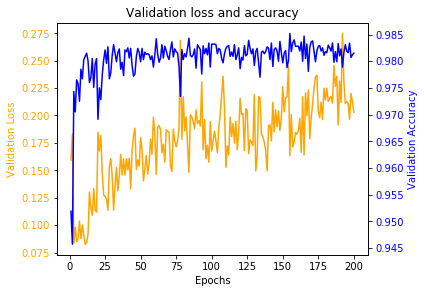

In [6]:
# Plot the validation loss and accuracy
nn_loss = nn_hist.history['val_loss']
nn_acc = nn_hist.history['val_acc']
epochs = range(1, len(nn_loss) + 1)

fig, ax1 = plt.subplots()
color = 'orange'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Loss', color=color)
ax1.plot(epochs, nn_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'b'
ax2.set_ylabel('Validation Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, nn_acc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Validation loss and accuracy")
plt.show()

In [7]:
print("We can see from the plot that the model performance starts to degrade after {:.0f} epochs.".format(np.argmin(nn_loss)+1))

We can see from the plot that the model performance starts to degrade after 11 epochs.


### Implement dropout

In [8]:
nn_dropout = models.Sequential()
nn_dropout.add(layers.Dense(512, activation='relu', input_shape=(28**2,)))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(10, activation='softmax'))
nn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
dropout_hist = nn_dropout.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


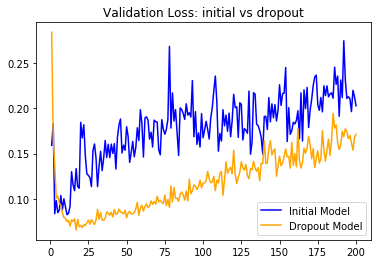

In [9]:
# Plot the validation loss and accuracy
dropout_loss = dropout_hist.history['val_loss']
dropout_acc = dropout_hist.history['val_acc']
epochs = range(1, len(dropout_loss) + 1)
plt.plot(epochs, nn_loss, color = 'b', label='Initial Model')
plt.plot(epochs, dropout_loss, color = 'orange', label='Dropout Model')
plt.legend()
plt.title("Validation Loss: initial vs dropout")
plt.show()

The dropout trick makes the model perform better than the original setting.

### Implement Weight Regularization

#### L1-Norm

In [10]:
nn_regu1 = models.Sequential()
nn_regu1.add(layers.Dense(512, activation='relu', input_shape=(28**2,), kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(10, activation='softmax'))
nn_regu1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
regu1_hist = nn_regu1.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)

#### L2-Norm

In [11]:
nn_regu2 = models.Sequential()
nn_regu2.add(layers.Dense(512, activation='relu', input_shape=(28**2,), kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(10, activation='softmax'))
nn_regu2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
regu2_hist = nn_regu2.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)

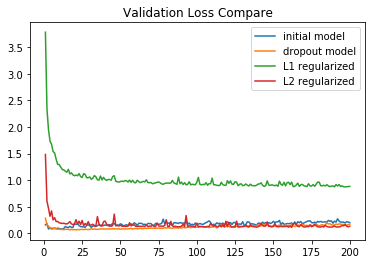

In [12]:
regu1_loss = regu1_hist.history['val_loss']
regu2_loss = regu2_hist.history['val_loss']
epochs = np.arange(1, len(regu1_loss)+1)
plt.plot(epochs, nn_loss, label = 'initial model')
plt.plot(epochs, dropout_loss, label = 'dropout model')
plt.plot(epochs, regu1_loss, label = 'L1 regularized')
plt.plot(epochs, regu2_loss, label = 'L2 regularized')
plt.legend()
plt.title('Validation Loss Compare')
plt.show()

The dropout model seems to have the best performance out of the four model settings, in terms of validation loss.

### Evaluate alternative model settings

From the above trials, we presume that the L1 regularized model has a less satisfactory performance than the other two. And in case the the L2-norm regularized model will be super time consuming, we decide to tune up hyperparameter settings for the initial model and the dropout model.

In [13]:
# I will try a series of models with different number of hidden units, various dropout rates)
hid_units = np.logspace(base = 2, start= 5, stop = 9, num= 5, dtype = np.int)
dropout_rates = np.arange(0.3, 0.6, step = 0.1)

In [14]:
init_losses = []
dropout_losses = []
for unit in hid_units:
    # initial model
    nn = models.Sequential()
    nn.add(layers.Dense(unit, activation='relu', input_shape=(28**2,)))
    nn.add(layers.Dense(unit, activation='relu'))
    nn.add(layers.Dense(unit, activation='relu'))
    nn.add(layers.Dense(unit, activation='relu'))
    nn.add(layers.Dense(10, activation='softmax'))
    nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    nn_hist = nn.fit(train_imgs, train_labels, validation_data=(valid_imgs, valid_labels),
                epochs=200, batch_size=512, verbose=0)
    init_losses.append(nn_hist.history['val_loss'])
    dropout_loss_arr = []
    for r in dropout_rates:
        nn_dropout = models.Sequential()
        nn_dropout.add(layers.Dense(unit, activation='relu', input_shape=(28**2,)))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(unit, activation='relu'))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(unit, activation='relu'))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(unit, activation='relu'))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(10, activation='softmax'))
        nn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        dropout_hist = nn_dropout.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)
        dropout_loss_arr.append(dropout_hist.history['val_loss'])
    dropout_losses.append(dropout_loss_arr)

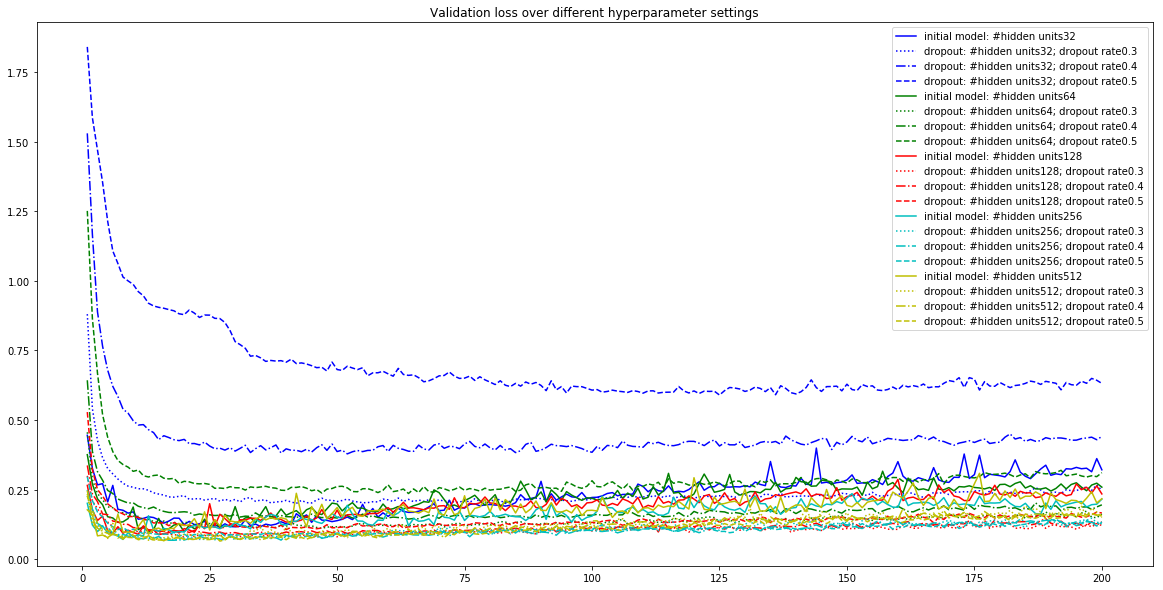

In [19]:
epochs = np.arange(1, 201)
linestyle = [':','-.','--']
color = ['b','g','r','c','y']
plt.figure(figsize=(20, 10))
for i in range(len(hid_units)):
    plt.plot(epochs, init_losses[i], color=color[i], label='initial model: #hidden units'+str(hid_units[i]))
    dropout_loss_arr = dropout_losses[i]
    for j in range(len(dropout_loss_arr)):
        plt.plot(epochs, dropout_loss_arr[j], color=color[i], linestyle=linestyle[j],
                 label='dropout: #hidden units'+str(hid_units[i]) + "; dropout rate" + str(dropout_rates[j]))

plt.legend()
plt.title("Validation loss over different hyperparameter settings")
plt.show()

In [25]:
# Calculate where is the minimum loss
init_min = np.array(init_losses).min(axis=1)
dropout_min = np.array(dropout_losses).min(axis=2)

In [30]:
print("initial model:", init_min.min())
print("dropout model:", dropout_min.min())

initial model: 0.07138648265600205
dropout model: 0.06541615447998046


In [32]:
print(dropout_min)

[[0.20050821 0.37849923 0.58982205]
 [0.11144536 0.1443804  0.23620563]
 [0.07917593 0.08937591 0.10680627]
 [0.06720339 0.06843168 0.07915574]
 [0.06861414 0.06643744 0.06541615]]


The dropout model has the lowest loss, which has a hyperparametric setting of 512 hidden units on each layer, and a dropout rate of 0.5. This can also be validated from the plot above, as the last model is indeed one of those at the bottom for any number of epochs.

In [34]:
print("The optimal epoch should be where the lowest validation loss is reached: {}".
      format(np.argmin(dropout_losses[-1][-1])+1))

The optimal epoch should be where the lowest validation loss is reached: 27


## Final Model

I will proceed with the optimal model hyperparameter setting determined from above.

In [43]:
# Load the data again
random.seed(1234)
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
train_imgs = train_imgs.reshape((60000, 28**2)).astype('float32') / 255
test_imgs = test_imgs.reshape((10000, 28**2)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
nn_dropout = models.Sequential()
nn_dropout.add(layers.Dense(512, activation='relu', input_shape=(28**2,)))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(10, activation='softmax'))
nn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
nn_dropout.fit(train_imgs, train_labels, epochs=27, batch_size=512, verbose=0)
results = nn_dropout.evaluate(test_imgs, test_labels)

10000/10000 [==============================] - 1s 99us/step


In [45]:
print(results)

[0.08860660790035763, 0.983]


Compared to the performance in the training process, the model did not generalized so well to the testing set (the old loss was 0.06541615447998046, but now it is 0.08860660790035763). But the model has a relatively high accuracy rate. This model outperforms other models probably because it has more hidden units than other models that I tried, which is more capable of capturing complex linguistic structures. And it is regularized by using the dropout trick, and has fewer epochs, which all protect the model from overfitting the training set.